In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
%matplotlib inline

In [64]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

In [65]:
?Voronoi

In [66]:
vor = Voronoi(points)

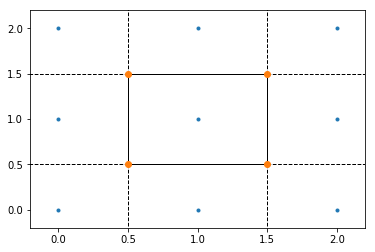

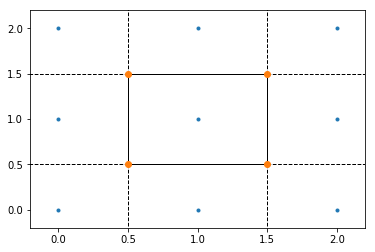

In [67]:
voronoi_plot_2d(vor)

In [68]:
vor.vertices

array([[0.5, 0.5],
       [1.5, 0.5],
       [0.5, 1.5],
       [1.5, 1.5]])

In [69]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [3, 2, 0, 1],
 [2, -1, 0],
 [3, -1, 1]]

In [70]:
vor.ridge_vertices

[[-1, 0],
 [-1, 0],
 [-1, 1],
 [-1, 1],
 [0, 1],
 [-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 3],
 [-1, 2],
 [0, 2],
 [1, 3]]

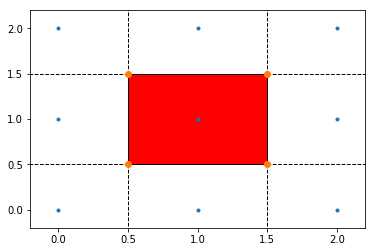

In [71]:
voronoi_plot_2d(vor)

# colorize

for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color="red")

## Nearest neighbor

Illustratie van beslissingsregels. 

Gebruik dataset van [Sklearn](https://scikit-learn.org/stable/datasets/index.html).

In [72]:
from sklearn.datasets import load_iris

iris = load_iris()

In [73]:
data = iris["data"]
feature_names = iris["feature_names"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
species = iris["target_names"]
target = iris["target"]
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
X = data[:,[2, 3]]
vor = Voronoi(X)

Text(0, 0.5, 'petal width (cm)')

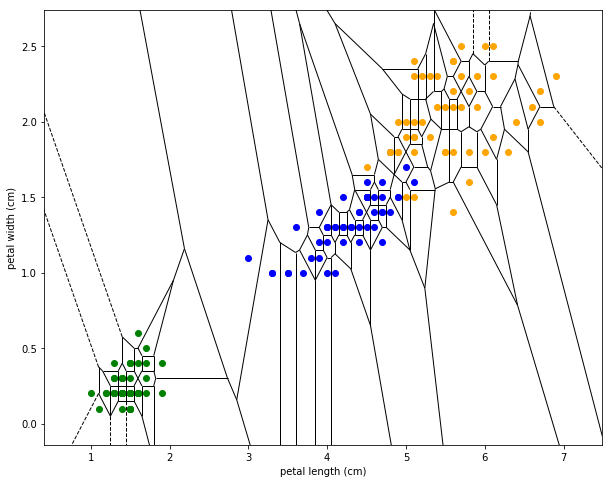

In [76]:
fig = voronoi_plot_2d(vor, show_vertices=False, show_points=False)
ax = fig.get_axes()[0]
fig.set_size_inches((10, 8))

for (x1, x2), lab in zip(X, target):
    if lab==0:
        col = "green"
    elif lab==1:
        col = "blue"
    else:
        col = "orange"
    ax.scatter(x1, x2, color=col)

ax.set_xlabel(feature_names[2])
ax.set_ylabel(feature_names[3])